<a href="https://colab.research.google.com/github/difo23/BitacorasDataScienceDominicano/blob/master/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Regresion Logistica
Bitacora sobre la regresion logista hermana cercana de la regrsion lineal. En focada en variables booleanas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ls

drive/  sample_data/


In [4]:
cd drive

/content/drive


In [5]:
ls

'My Drive'/


In [6]:
cd 'My Drive'

/content/drive/My Drive


In [7]:
ls

'Assignment tracker.gsheet'
 Backup/
 bank.csv
 Calificaciones2019/
'Cambiar contraseña root y usuario en ubuntu.gdoc'
 cemascondiciones/
'Colab Notebooks'/
 Colab_Notebooks/
'curso definitivo de javascript'/
'Cursos DigData'/
 DigdataProyectos/
'Ejercicios 5 D y 5B'/
 enero72020/
'Getting started.pdf'
 RA/


In [0]:
data = pd.read_csv("./bank.csv", sep=";")

In [46]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [47]:
data.shape

(4119, 21)

In [48]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [49]:
data.columns.value_counts()

duration          1
campaign          1
education         1
loan              1
contact           1
day_of_week       1
housing           1
euribor3m         1
previous          1
default           1
marital           1
y                 1
cons.conf.idx     1
cons.price.idx    1
job               1
pdays             1
nr.employed       1
emp.var.rate      1
poutcome          1
month             1
age               1
dtype: int64

In [0]:
data['y']= (data["y"] == "yes").astype(int)

In [51]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [63]:
data["education"].unique()

array(['basic', 'High School', 'University', 'Profesional Course',
       'unknown', 'illiterate'], dtype=object)

In [0]:
data["education"] = np.where(data["education"]== "basic.4y","basic", data["education"] )
data["education"] = np.where(data["education"]== "high.school","High School", data["education"] )
data["education"] = np.where(data["education"]== "basic.6y","basic", data["education"] )
data["education"] = np.where(data["education"]== "basic.9y","basic", data["education"] )
data["education"] = np.where(data["education"]== "university.degree","University", data["education"] )
data["education"] = np.where(data["education"]== "professional.course","Profesional Course", data["education"] )


In [65]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [68]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [69]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Profesional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

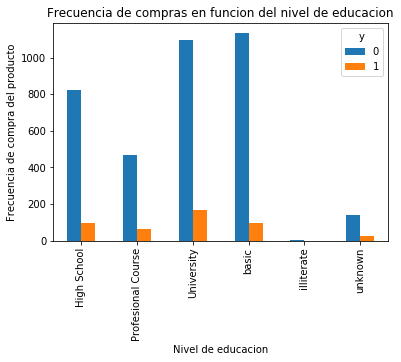

In [74]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind= "bar")
plt.title("Frecuencia de compras en funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'proporcion de clientes')

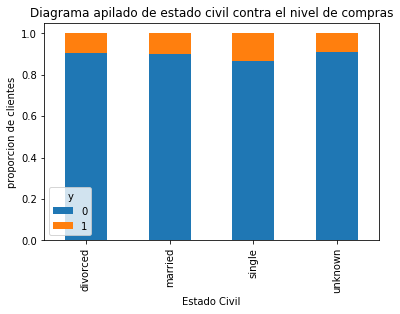

In [76]:
%matplotlib inline
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind= "bar", stacked= True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("proporcion de clientes")

Text(0, 0.5, 'proporcion de clientes')

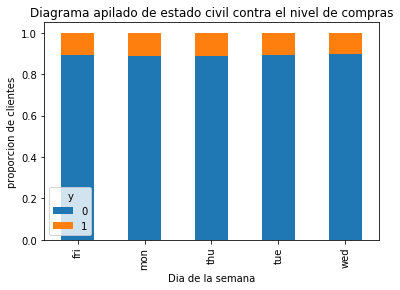

In [79]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind= "bar", stacked= True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Dia de la semana")
plt.ylabel("proporcion de clientes")

Text(0, 0.5, 'proporcion de clientes')

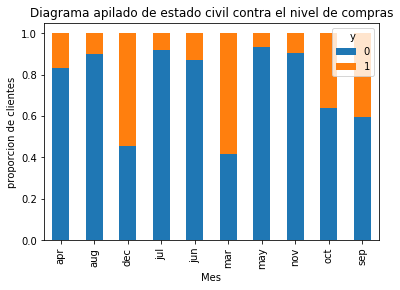

In [80]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind= "bar", stacked= True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Mes")
plt.ylabel("proporcion de clientes")

Text(0, 0.5, 'proporcion de clientes')

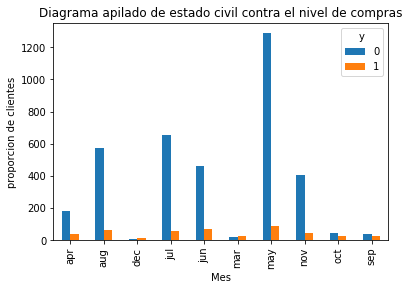

In [81]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.plot(kind= "bar", stacked= False)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Mes")
plt.ylabel("proporcion de clientes")

Text(0, 0.5, 'Cliente')

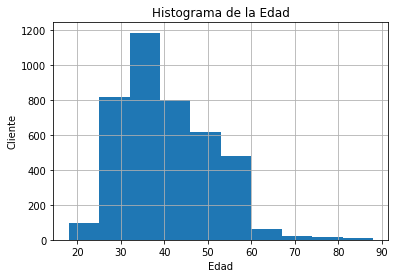

In [82]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")